In [25]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
ed = tfp.edward2
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:78: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering


In [2]:
try:
  tf.enable_eager_execution()
except:
  pass

In [19]:
def cifa(N = 1000, K = 2, C = 3, P = 4):
    factor_std = ed.InverseGamma(concentration=1., rate=1., sample_shape=(C,K), name='factor_std')
    factor_mix_weights = ed.Dirichlet(concentration=np.ones(K), sample_shape=(C,), name='factor_mix_weights')
    z = ed.Independent(
        tfd.MixtureSameFamily(
            mixture_distribution=tfd.Categorical(probs=factor_mix_weights),
            components_distribution=tfd.Normal(loc=tf.zeros_like(factor_std), scale=factor_std, name='component')),
        reinterpreted_batch_ndims=1,sample_shape=(N,),name='source')
    w = ed.Normal(loc=0., scale=1., sample_shape=(C, P), name='factor_loadings')
    X = tf.matmul(z, w, name='latent')
    noise_sigma = ed.InverseGamma(concentration=1., rate=1., sample_shape=(1,P), name='output_noise')
    Y = ed.Normal(loc=X, scale=noise_sigma, name='data')  
    return Y

In [23]:
model = cifa(P=2)

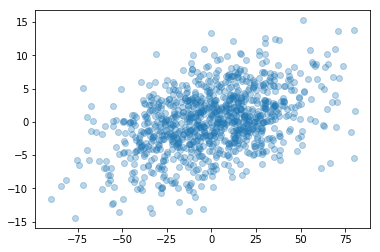

In [31]:
plt.scatter(*model.numpy().T,alpha=.3)